In [60]:
import math
import mmh3
import random

In [61]:
class BloomFilter:
    def __init__(self, n, m, k=1, p=1):
        self.n = n  # Number of elements
        self.m = m  # Size of bit vector
        self.k = k  # Number of hash functions
        self.p = p  # Number of bit vectors
        self.bit_vectors = [bytearray(m // (8 * p)) for _ in range(p)]

    def hash(self, element, seed):
        return mmh3.hash(element, seed) % self.m

    def insert(self, element):
        for i in range(self.p):
            for j in range(self.k):
                seed = i * self.k + j
                hash_val = self.hash(element, seed)
                bit_vector_index = (hash_val % (self.m // (8 * p))) // 8
                bit_index = hash_val % 8
                self.bit_vectors[i][bit_vector_index] |= (1 << bit_index)

    def check(self, element):
        for i in range(self.p):
            for j in range(self.k):
                seed = i * self.k + j
                hash_val = self.hash(element, seed)
                bit_vector_index = (hash_val % (self.m // (8 * p))) // 8
                bit_index = hash_val % 8
                if not self.bit_vectors[i][bit_vector_index] & (1 << bit_index):
                    return False
        return True

In [62]:
def false_positive_rate(n, m, k, p):
    exponent = k * p
    base = 1 - p / m
    return float((1 - base ** (k * n // p)) ** exponent)

In [63]:
def simulate(n, m, k, p, num_trials, element_range=(0, 1000000), non_member_range=(1000001, 2000000)):
    random.seed(42)  # Set random seed for reproducibility
    bf = BloomFilter(n, m, k, p)
    elements = [str(random.randint(*element_range)) for _ in range(n)]
    non_members = [str(random.randint(*non_member_range)) for _ in range(num_trials)]

    for element in elements:
        bf.insert(element)

    false_positives = sum(bf.check(non_member) for non_member in non_members)
    return false_positives / num_trials

In [64]:
# Example usage
n = 1000  # Number of elements
m = 8000  # Size of bit vector
k = 1  # Number of hash functions
p = 1  # Number of bit vectors
num_trials = 10  # Number of trials for false positive rate simulation

In [65]:
#change the number of k
f=[] #therotical false positive
s=[] # simulated false positive
for k in range(0, 100):
    f.append(false_positive_rate(n, m, k, p))
    s.append(simulate(n, m, k, p, num_trials))

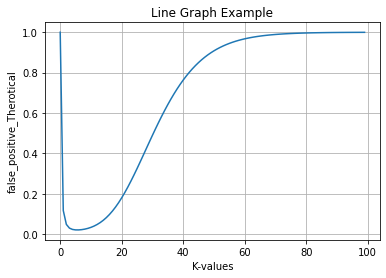

In [66]:
import matplotlib.pyplot as plt

# Create x-axis values (assuming x-axis represents indices of data points)
x_values = range(len(f))

# Plot the line graph
plt.plot(x_values,f, linestyle='-')

# Add labels and title
plt.xlabel('K-values')
plt.ylabel('false_positive_Therotical')
plt.title('Line Graph Example')

# Display the plot
plt.grid(True)
plt.show()

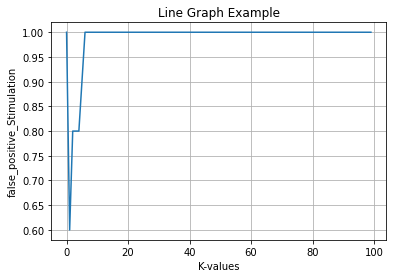

In [67]:
import matplotlib.pyplot as plt

# Create x-axis values (assuming x-axis represents indices of data points)
x_values = range(len(s))

# Plot the line graph
plt.plot(x_values,s, linestyle='-')

# Add labels and title
plt.xlabel('K-values')
plt.ylabel('false_positive_Stimulation')
plt.title('Line Graph Example')

# Display the plot
plt.grid(True)
plt.show()

In [68]:
#change the number of bit vectors
b=[]
th = []
for p in range(1,100):
    b.append(false_positive_rate(n, m, k, p))
    th.append(simulate(n, m, k, p, num_trials))

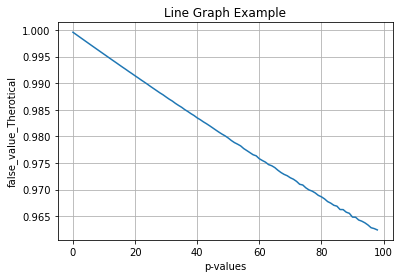

In [69]:
import matplotlib.pyplot as plt

# Create x-axis values (assuming x-axis represents indices of data points)
x_values = range(len(b))

# Plot the line graph
plt.plot(x_values,b, linestyle='-')

# Add labels and title
plt.xlabel('p-values')
plt.ylabel('false_value_Therotical')
plt.title('Line Graph Example')

# Display the plot
plt.grid(True)
plt.show()

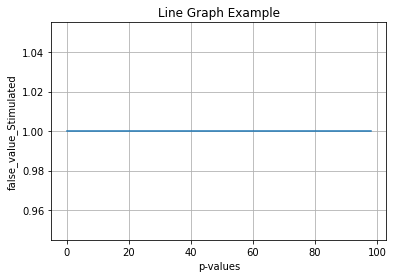

In [70]:
import matplotlib.pyplot as plt

# Create x-axis values (assuming x-axis represents indices of data points)
x_values = range(len(th))

# Plot the line graph
plt.plot(x_values,th, linestyle='-')

# Add labels and title
plt.xlabel('p-values')
plt.ylabel('false_value_Stimulated')
plt.title('Line Graph Example')

# Display the plot
plt.grid(True)
plt.show()